**Phân khúc khách hàng** là cách phân loại và sắp xếp khách hàng vào từng nhóm dựa trên nhu cầu và hành vi của khách hàng nhằm để khuyến mãi và marketing dễ dàng và nhanh chóng hơn.

**Làm thế nào để phân khúc?**

- Xác định mục tiêu của việc phân khúc
- Tiến hành phân khúc khác hàng theo các nhóm đã chọn
    - Theo nhân khẩu học
    - Theo tâm lý học
    - Theo hành vi, thái độ
    - Theo địa lý
- Tiếp cận khách hàng đã phân khúc theo đặc điểm, nhu cầu của họ.
- Phân tích các phân khúc khách hàng đó và thực hiện các điều chỉnh khi cần thiết


In [1]:
# Yêu cầu: hãy gom nhóm tập khách hàng sau của công ty bán lẻ ABC dựa trên 
# (i) thu nhập hằng năm (Annual Income) và
# (ii) điểm thành viên (Spending Score)
# Nạp các gói thư viện cần thiết 
import pandas as pd

### 1. Chuẩn bị dữ liệu

In [2]:
# Đọc dữ liệu từ tập tin csv
df = pd.read_csv('https://raw.githubusercontent.com/ltdaovn/dataset/master/ABC_Customers.csv')
# Lấy dữ liệu thu nhập hằng năm (Annual Income)
# và điểm thành viên (Spending Score) để phân lớp 
X = df.iloc[:, [3, 4]].values

### 2. Tiến hành gom nhóm
Khi sử dụng kmeans để gom nhóm, câu hỏi đặt ra là với dataset đã có,

chúng ta sẽ phân thành bao nhiêu cụm là hợp lý (tối ưu)?

Trong ví dụ này chúng ta sẽ sử dụng phương pháp Elbow để xác định số cụm k. 

Tài liệu tham khảo phương pháp Elbow
https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set

Chạy thuật toán KMeans với k=(1, 10)

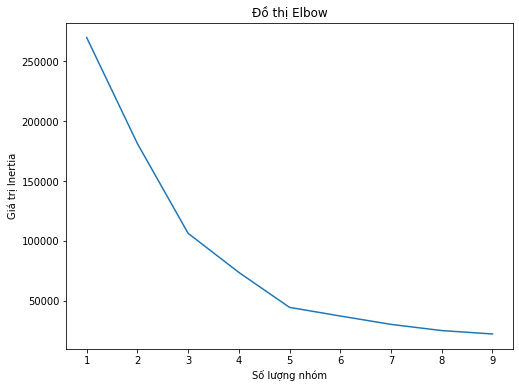

In [3]:
from sklearn.cluster import KMeans
clusters = []

for i in range(1, 10):
    km = KMeans(n_clusters=i).fit(X)
    # inertia: tổng bình phương khoảng cách của các mẫu đến trung tâm cụm gần gần của chúng
    clusters.append(km.inertia_)

import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 6)) 
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Đồ thị Elbow')
ax.set_xlabel('Số lượng nhóm')
ax.set_ylabel('Giá trị Inertia')
plt.show()

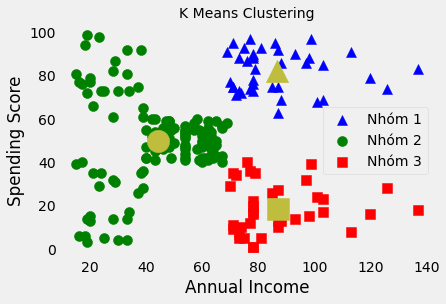

In [35]:
plt.clf()
# Qua đồ thị trên, chúng ta thấy số lượng cluster thích hợp là từ 3 đến 5
# Phân tích dữ liệu được gom thành 3 nhóm 
km3 = KMeans(n_clusters=3)
y_means = km3.fit_predict(X) #print(y_means)
attrs = [['blue', '^'], ['green', 'o'], ['red', 's']]
for i in range(3):
    c = attrs[i][0]
    marker = attrs[i][1]
    plt.scatter(X[y_means == i, 0], X[y_means == i, 1], s = 100, c=c, label = 'Nhóm %d'%(i+1), marker=marker)

for i in range(3):
    marker = attrs[i][1]
    plt.scatter(km3.cluster_centers_[i,0], km3.cluster_centers_[i, 1], s = 500, c='#BFBD3D', marker=marker)
    
plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 14)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()